In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('supply.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [4]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [5]:
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64


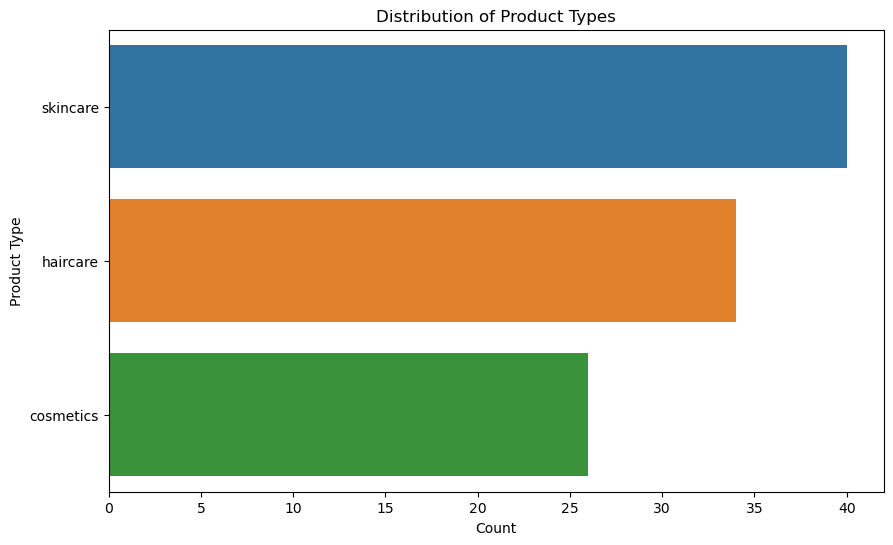

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Product type', data=data, order=data['Product type'].value_counts().index)
plt.title('Distribution of Product Types')
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

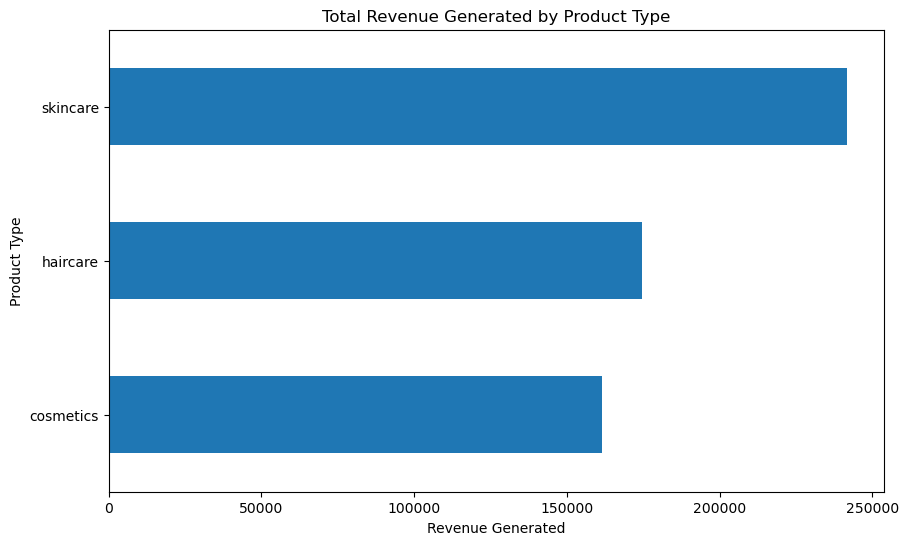

In [6]:
plt.figure(figsize=(10, 6))
data.groupby('Product type')['Revenue generated'].sum().sort_values().plot(kind='barh')
plt.title('Total Revenue Generated by Product Type')
plt.xlabel('Revenue Generated')
plt.ylabel('Product Type')
plt.show()

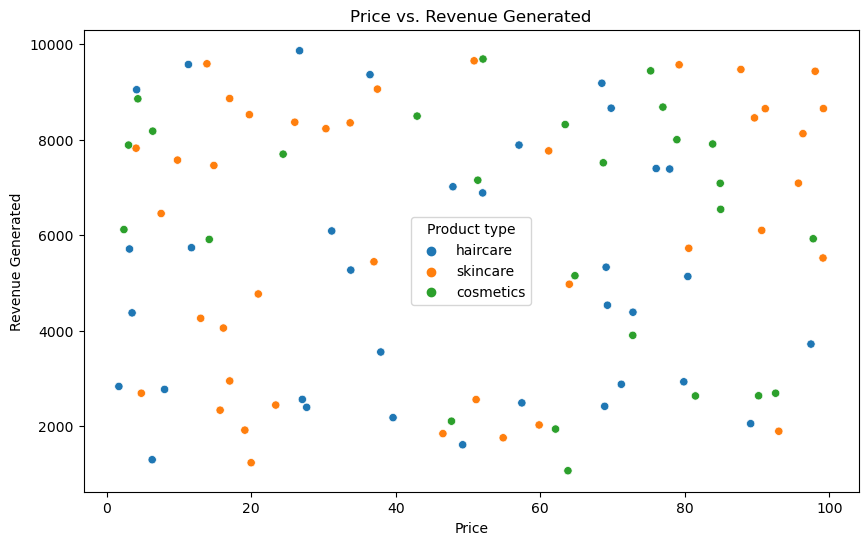

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Revenue generated', hue='Product type', data=data)
plt.title('Price vs. Revenue Generated')
plt.xlabel('Price')
plt.ylabel('Revenue Generated')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

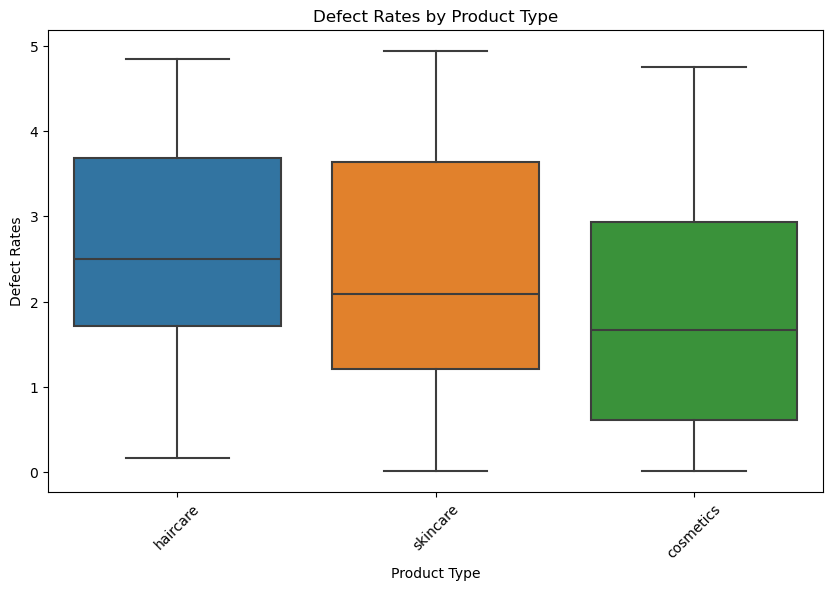

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product type', y='Defect rates', data=data)
plt.title('Defect Rates by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Defect Rates')
plt.xticks(rotation=45)
plt.show()

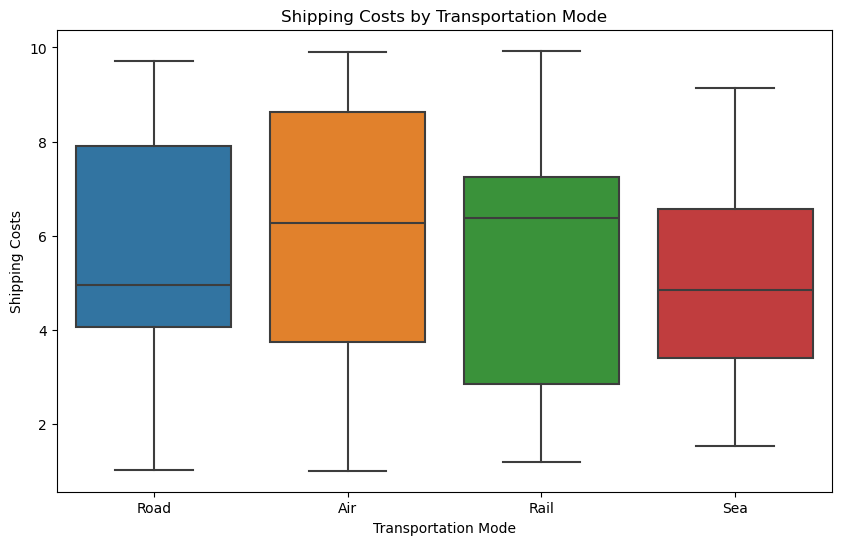

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transportation modes', y='Shipping costs', data=data)
plt.title('Shipping Costs by Transportation Mode')
plt.xlabel('Transportation Mode')
plt.ylabel('Shipping Costs')
plt.show()

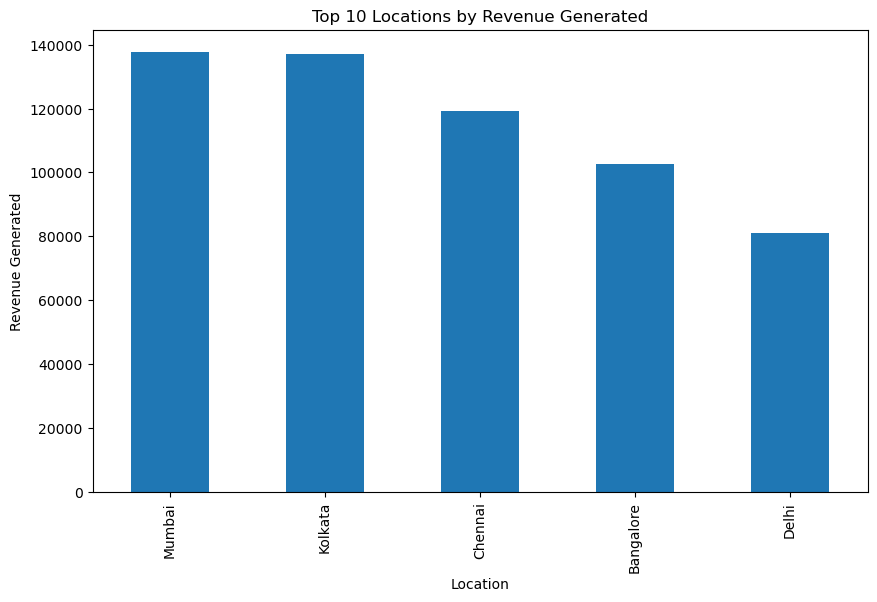

In [11]:
plt.figure(figsize=(10, 6))
data.groupby('Location')['Revenue generated'].sum().nlargest(10).plot(kind='bar')
plt.title('Top 10 Locations by Revenue Generated')
plt.xlabel('Location')
plt.ylabel('Revenue Generated')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2680\829387790.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product type', y='Revenue per Unit', data=data, ci=None, estimator=np.mean)


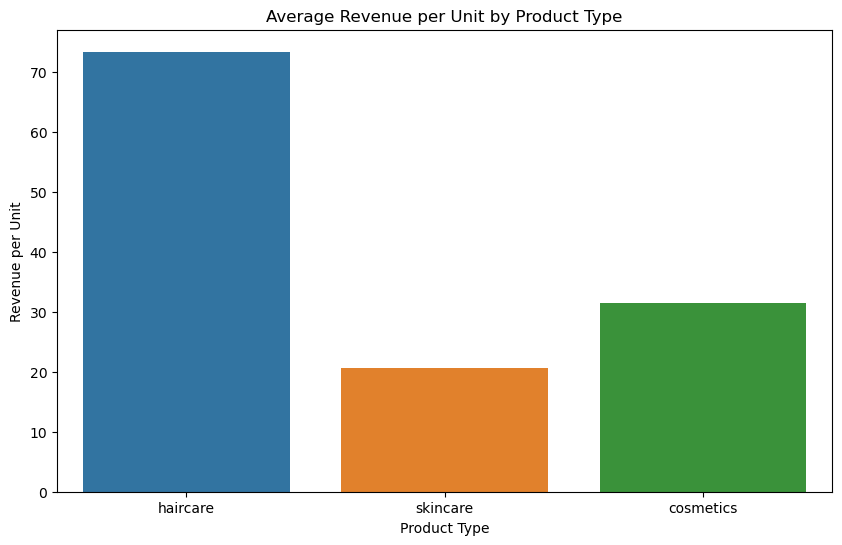

In [9]:
data['Revenue per Unit'] = data['Revenue generated'] / data['Number of products sold']
plt.figure(figsize=(10, 6))
sns.barplot(x='Product type', y='Revenue per Unit', data=data, ci=None, estimator=np.mean)
plt.title('Average Revenue per Unit by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Revenue per Unit')
plt.xticks(rotation=0)
plt.show()